In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
from pandas.io.json import json_normalize

In [69]:
filename = 'data/world_bank_projects.json'
df = pd.read_json(filename)
df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


                           Country  Project_count
0       People's Republic of China             19
1            Republic of Indonesia             19
2    Socialist Republic of Vietnam             17
3                Republic of India             16
4                Republic of Yemen             13
5                            Nepal             12
6  People's Republic of Bangladesh             12
7               Kingdom of Morocco             12
8           Republic of Mozambique             11
9     Islamic Republic of Pakistan              9


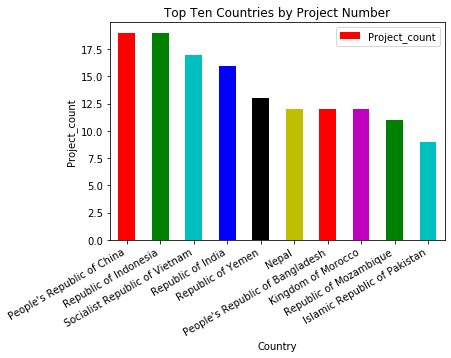

In [70]:
#Problem 1: find the top ten countries with most number of projects
"""
Use dataframe boolean to exclude entries with Africa as the country, since Africa is not a country
Perform counts of occurence for each country name to get the number of projects per country using value_counts() method
Reset the column names of output dataframe for readability
"""
top_countries = df[df['countryname'] != 'Africa'].countryname.value_counts().head(10).reset_index()
top_countries.columns = ['Country','Project_count']
print(top_countries)

top_countries.plot(kind='bar',x='Country',y='Project_count',color=['r','g','c','b','k','y','r','m','g','c'])
plt.ylabel('Project_count')
plt.title('Top Ten Countries by Project Number')
plt.xticks(rotation=30, ha='right')
plt.show()

  Project_code  Number_occurences
0           11                250
1           10                216
2            8                210
3            2                199
4            6                168
5            4                146
6            7                130
7            5                 77
8            9                 50
9            1                 38


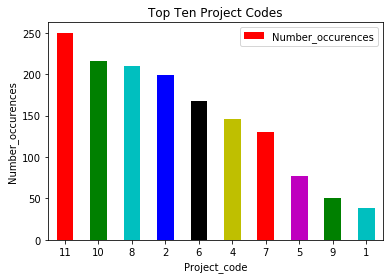

In [71]:
#Problem 2:  Find the top 10 major project themes (using column 'mjtheme_namecode')

#Load the JSON data into text in order to be able to use the json_normalize function, needed to flatten the data in mjtheme_namecode
data = json.load((open(filename)))
df2 = json_normalize(data, 'mjtheme_namecode')

#Obtain the top project codes, since there are empty values in project name column
#reset index, and print top ten codes
top_proj_themes = df2.code.value_counts().head(10).reset_index()
top_proj_themes.columns = ['Project_code','Number_occurences']
print(top_proj_themes)

#Plot top ten codes in a bar chart, add labels
top_proj_themes.plot(kind='bar',x='Project_code',y='Number_occurences',color=['r','g','c','b','k','y','r','m','g','c'])
plt.ylabel('Number_occurences')
plt.xticks(rotation=0)
plt.title('Top Ten Project Codes')
plt.show()

                              Project_code_name  Number_occurences
0  Environment and natural resources management                250
1                             Rural development                216
2                             Human development                210
3                      Public sector governance                199
4         Social protection and risk management                168
5      Financial and private sector development                146
6                   Social dev/gender/inclusion                130
7                         Trade and integration                 77
8                             Urban development                 50
9                           Economic management                 38


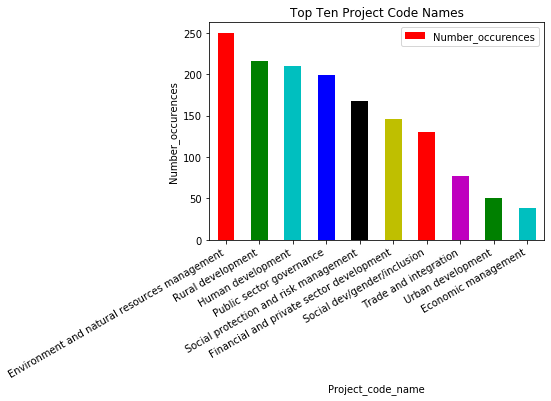

In [72]:
#Problem 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

#Create a dictionary mapping project codes to code names by removing blanks and setting the index to code
#Transpose, then apply to_dict() method
proj_codes = df2[df2['name'] != ''].drop_duplicates('name').set_index('code').T.to_dict('record')[0]

#Find empty strings and replace with NaN and set the index to code so you can do next step
#Fill NaN with fillna() method, specifying dictionary to map project codes to code names
df4 = df2.replace('',np.nan).set_index('code')
df4['name'] = df4['name'].fillna(proj_codes)
df4 = df4.reset_index()

df5 = df4.name.value_counts().head(10).reset_index()
df5.columns = ['Project_code_name','Number_occurences']
print(df5)

#Plot top project names
df5.plot(kind='bar',x='Project_code_name',y='Number_occurences',color=['r','g','c','b','k','y','r','m','g','c'])
plt.ylabel('Number_occurences')
plt.xticks(rotation=30, ha='right')
plt.title('Top Ten Project Code Names')
plt.show()